# Lyrid Training - Tidy Tuesdays 1: Suicide Dataset
The purpose of this notebook is to prepare, analyze, and visualize the data from the suicide dataset. This serves as my submission to Tidy Tuesdays 1, under the Lyrid Training Program.

### Python Libraries
The following are the necessary Python Libraries imported in this notebook. 

In [1]:
# Data analysis and data preparation
import pandas as pd
import numpy as np
import random as rnd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation
In Data Preparation, the dataset is cleaned by performing processes such as removing null values and resolving formatting issues. Data Preparation is necessary so that the data may be properly analyzed and meaningful conclusions will be derived from the analysis.

In [2]:
# Read csv corresponding to the suicide dataset.
df = pd.read_csv('master.csv')

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# Check the different columns present in the dataset.
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
# Check the number of null values per column.
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

After inspection, it can be seen that there is a redundant column (country-year) as well as a column (HDI for year) that has lots of null values. As such, both columns will be removed.

In [5]:
# Remove aforementioned columns.
df.drop(['country-year', 'HDI for year'], inplace=True, axis=1)

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


### Data Analysis
Now that the data has been cleaned, we can start analyzing our data.

In [6]:
# Group the dataset by year.
df1 = df.groupby('year', as_index=False).sum('suicides_no')

df1.head()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,1985,116063,1008600086,6811.89,3508548
1,1986,120670,1029909613,6579.84,4104636
2,1987,126842,1095029726,7545.45,5645760
3,1988,121026,1054094424,7473.13,5870508
4,1989,160244,1225514347,8036.54,6068424


Text(0, 0.5, 'Number of Cases')

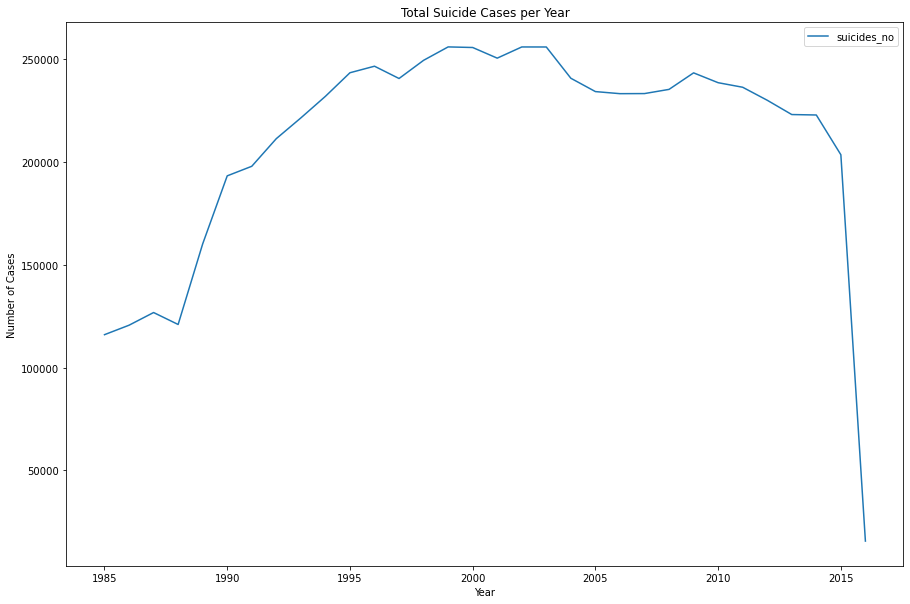

In [7]:
# Plot a line graph to show the number of suicide cases per year.
df1.plot(x='year', y='suicides_no', figsize=(15,10))
plt.title('Total Suicide Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

From the plot, it appears that there is an anomaly with the data for the year 2016. Perhaps the data gathered for that year is incomplete. As such, data from that year must be removed from the dataset.

Text(0, 0.5, 'Number of Cases')

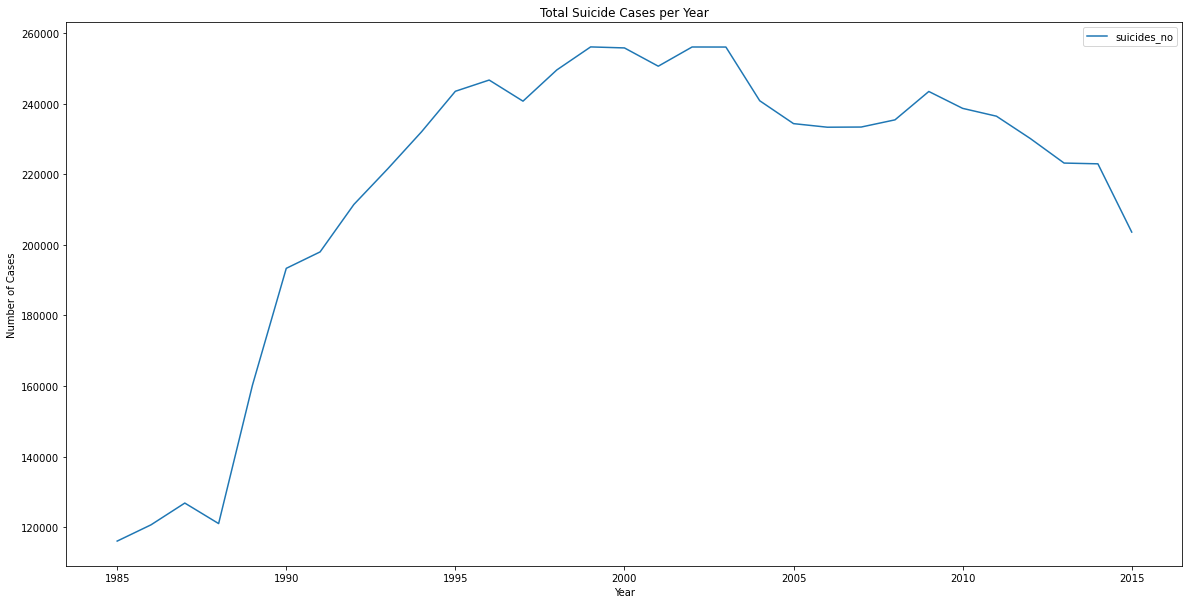

In [8]:
# Remove data from the year 2016.
df = df[df.year != 2016]
df1 = df1[df1.year != 2016]

# Plot the number of suicide cases again after removing data from 2016.
df1.plot(x='year', y='suicides_no', figsize=(20,10))
plt.title('Total Suicide Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

It can be observed that there has been a drastic rise in the number of suicide cases since the 1980s. It appears, however, that there is a downward trend for this number in the past few years. 

In [9]:
# Group the dataset by sex and year.
df2 = df.groupby(['year', 'sex'], as_index=False).sum('suicides_no')

df2.head()

,year,sex,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,1985,female,32479,513013055,1663.75,1754274
1,1985,male,83584,495587031,5148.14,1754274
2,1986,female,33852,524465866,1674.05,2052318
3,1986,male,86818,505443747,4905.79,2052318
4,1987,female,35006,559183789,1857.21,2822880


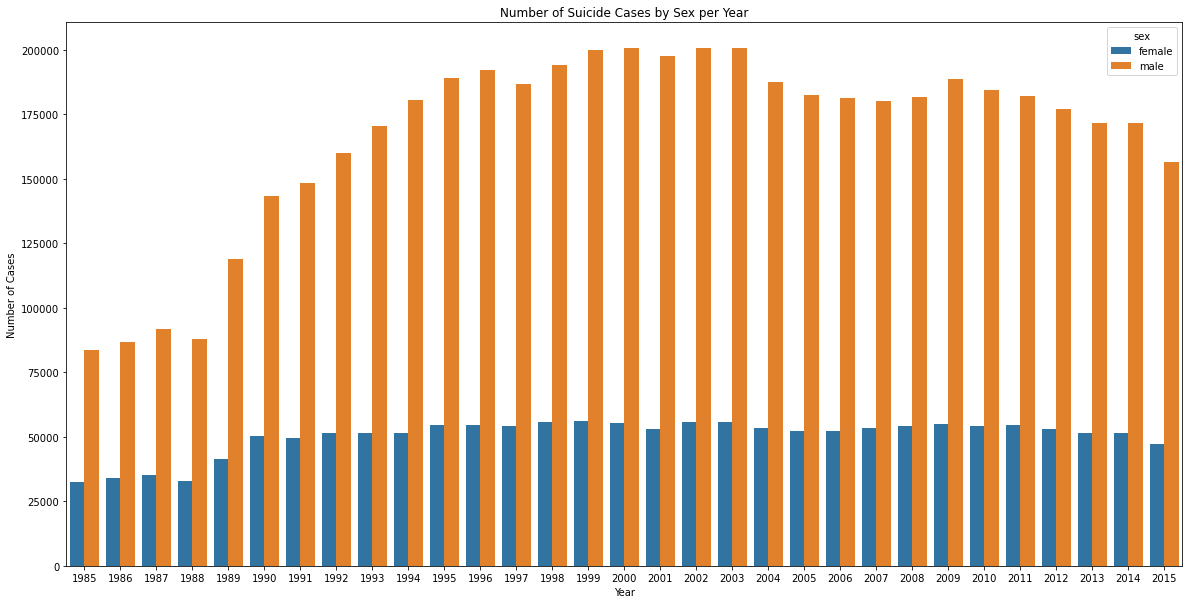

In [10]:
# Plot a bar graph to compare the number of suicide cases among males against those among females.
plt.figure(figsize=(20,10))
sns.barplot(x='year', y='suicides_no', data=df2, hue='sex')
plt.title('Number of Suicide Cases by Sex per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

The bar graph clearly shows that the number of suicide cases among males is consistently higher than among females. For males, the number of suicide cases has jumped significantly from the 1980s, whereas the number of suicide cases among females has been relatively stable.

In [11]:
# Group the dataset by age
df3 = df.groupby('age', as_index=False).sum('suicides_no')

df3.head()

,age,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,15-24 years,9225408,807347,8622650558,41292.61,77519770
1,25-34 years,9225408,1121842,8415461883,56239.60,77519770
2,35-54 years,9225408,2446375,14328573148,68960.47,77519770
3,5-14 years,9225408,52264,8398693237,2858.39,77519770
4,55-74 years,9225408,1653728,8771160760,74513.18,77519770


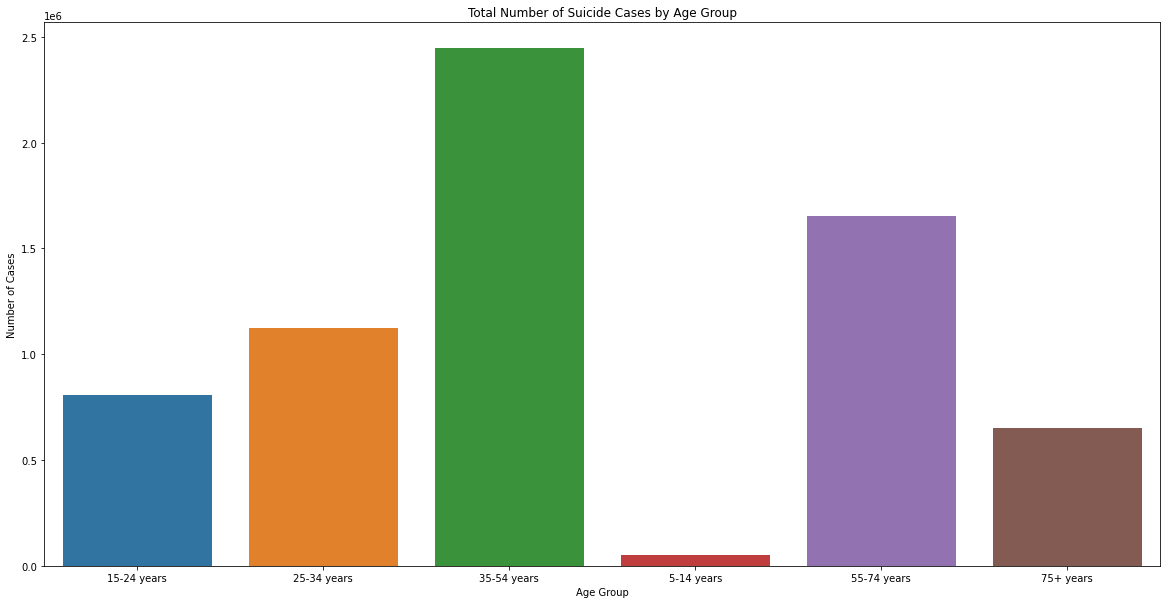

In [12]:
# Plot a bar graph to compare the total number of suicide cases by age group.
plt.figure(figsize=(20,10))
sns.barplot(x='age', y='suicides_no', data=df3)
plt.title('Total Number of Suicide Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')

plt.show()

From the bar graph, it can be clearly seen that the age group with the largest total number of suicide cases is from ages 35 to 54. This could be attributed to the so-called "midlife crisis" that commonly afflicts people within this age bracket. On the opposite end of the spectrum, the age group with the smallest total number of suicide cases, as one would expect, is from ages 5 to 14.

In [13]:
# Group the dataset by generation
df4 = df.groupby('generation', as_index=False).sum('suicides_no')

df4.head()

,generation,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,Boomers,9915730,2279783,13318427149,73082.03,78928884
1,G.I. Generation,5466166,510009,2126202724,65708.86,28519510
2,Generation X,12749040,1527038,13424794317,67222.90,99175310
3,Generation Z,2955886,15906,2503541842,944.18,37678558
4,Millenials,11586724,620194,10606523160,30889.74,109689318


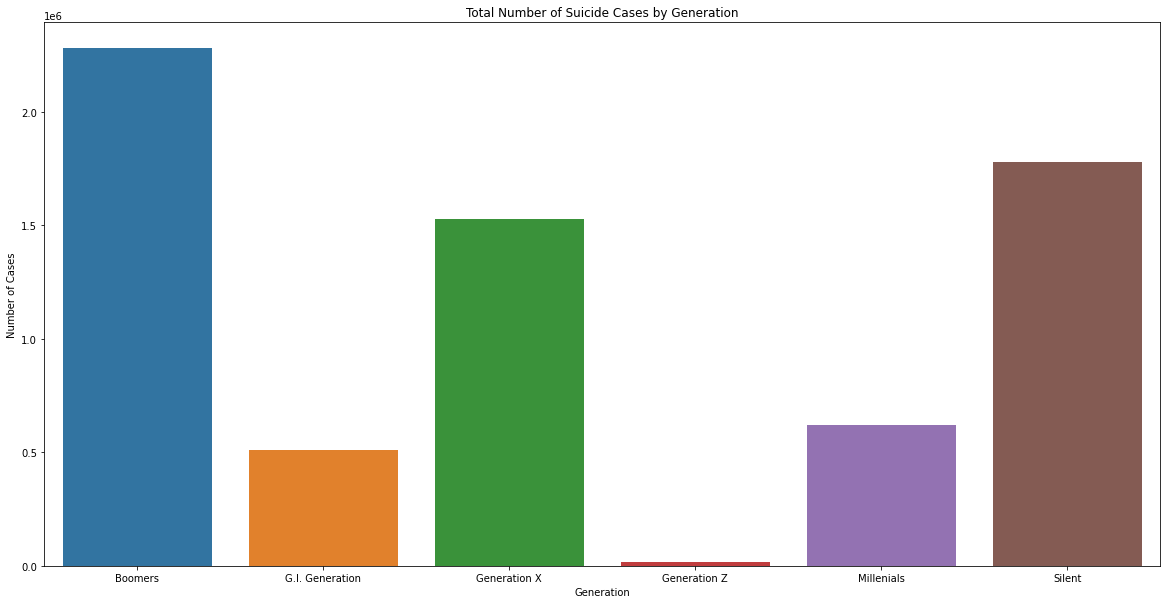

In [14]:
# Plot a bar graph to compare the total number of suicide cases by generation.
plt.figure(figsize=(20,10))
sns.barplot(x='generation', y='suicides_no', data=df4)
plt.title('Total Number of Suicide Cases by Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Cases')

plt.show()

From the bar graph, the generation with the most number of suicide cases is the Boomers. As seen in the previous graph, the age group with the largest number of suicide cases are those from ages 35 to 54. People belonging to the generation of Boomers are those that were born from 1946 to 1964. Across the years 1985 to 2015, the average age of the Boomers would be from 30 to 60. On the opposite end of the spectrum, the generation with the least number of suicide cases is Generation Z. The previous graph shows that the age group with the smallest number of suicide cases are those from ages 5 to 14. Generation Z is the youngest generation consisting of those born from 1997 to 2012. Therefore, this graph and the previous one are consistent with one another.

### Data Visualization
After performing some exploratory data analysis, it is time to properly visualize the data using more descriptive graphs. The graphs will be helpful in coming up with meaning conclusions.

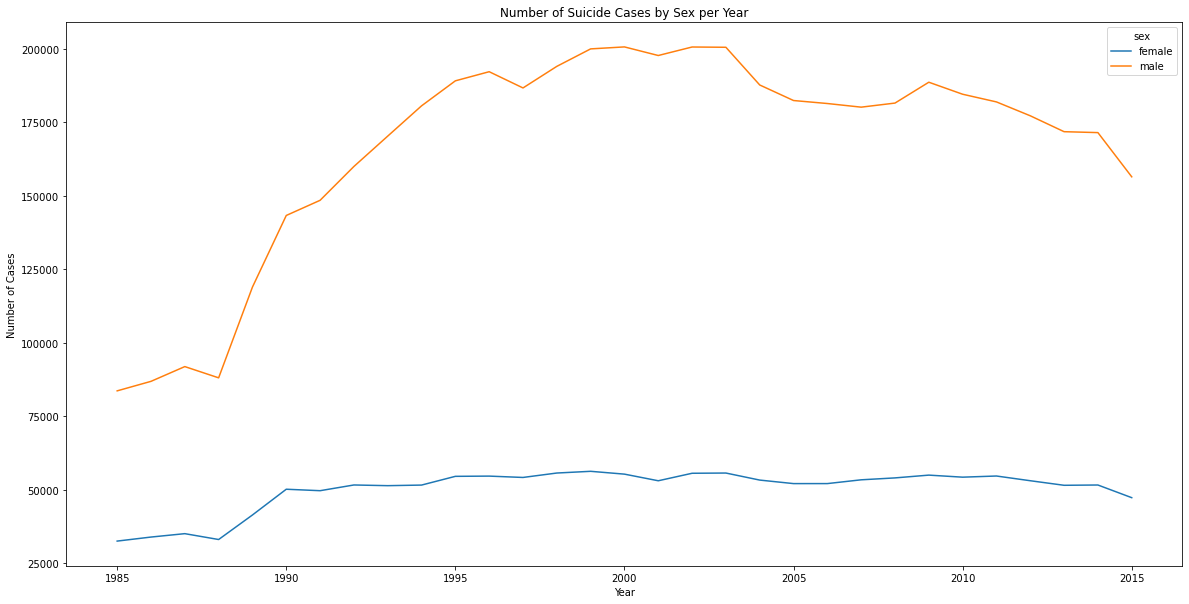

In [15]:
# Plot a more detailed graph to compare the number of suicide cases 
# among males and females per year.
plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='suicides_no', data=df2, hue='sex')
plt.title('Number of Suicide Cases by Sex per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

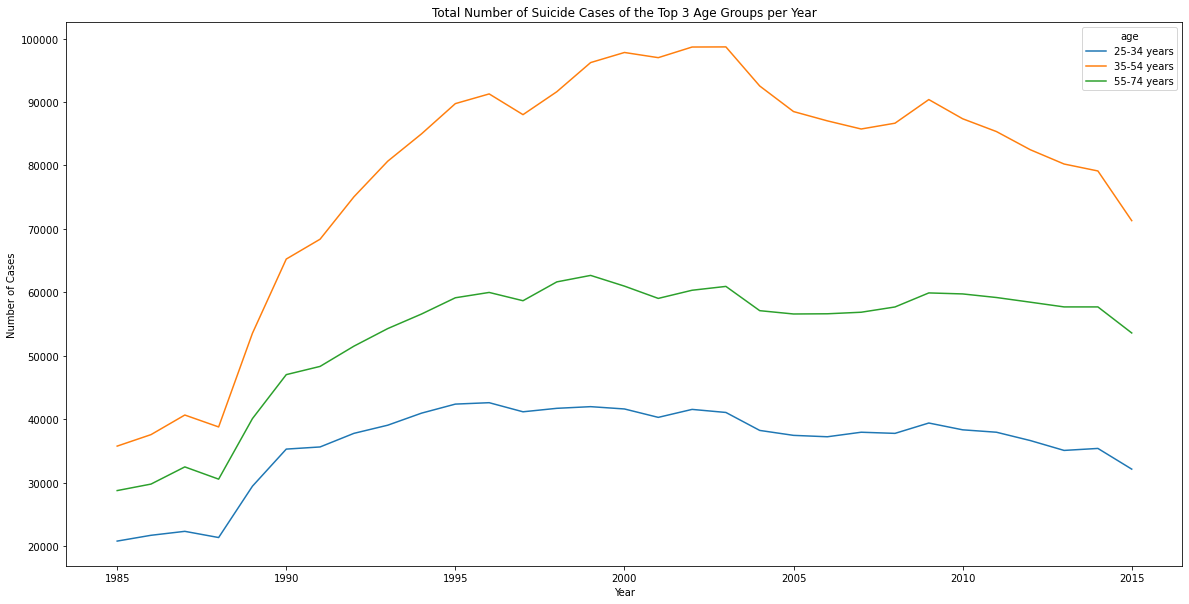

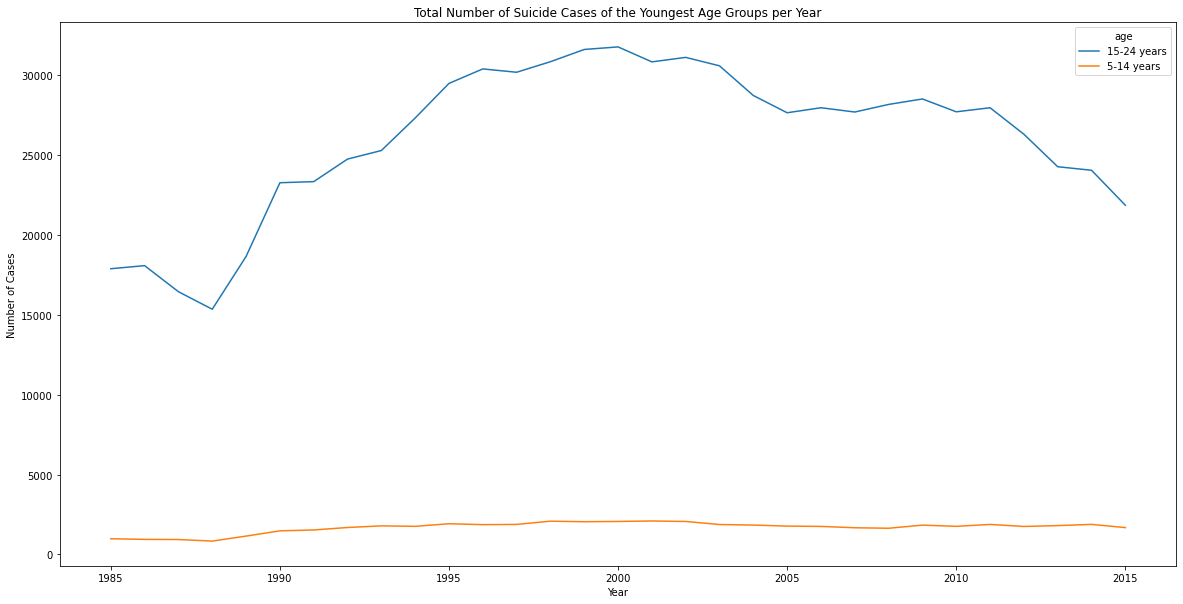

In [23]:
# Plot a more detailed graph to compare the number of suicide cases
# by age group per year.
df5 = df.groupby(['year', 'age'], as_index=False).sum('suicides_no')
df5_top = df5[(df5['age']=='25-34 years')|(df5['age']=='35-54 years')|(df5['age']=='55-74 years')]
df5_young = df5[(df5['age']=='5-14 years')|(df5['age']=='15-24 years')]

plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='suicides_no', data=df5_top, hue='age')
plt.title('Total Number of Suicide Cases of the Top 3 Age Groups per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='suicides_no', data=df5_young, hue='age')
plt.title('Total Number of Suicide Cases of the Youngest Age Groups per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

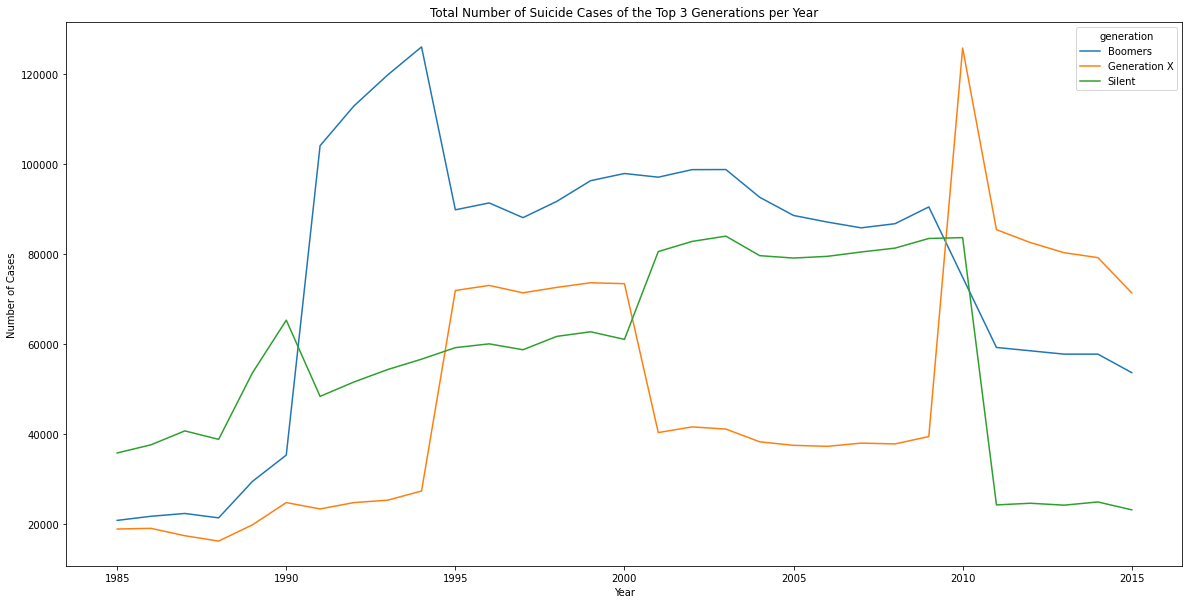

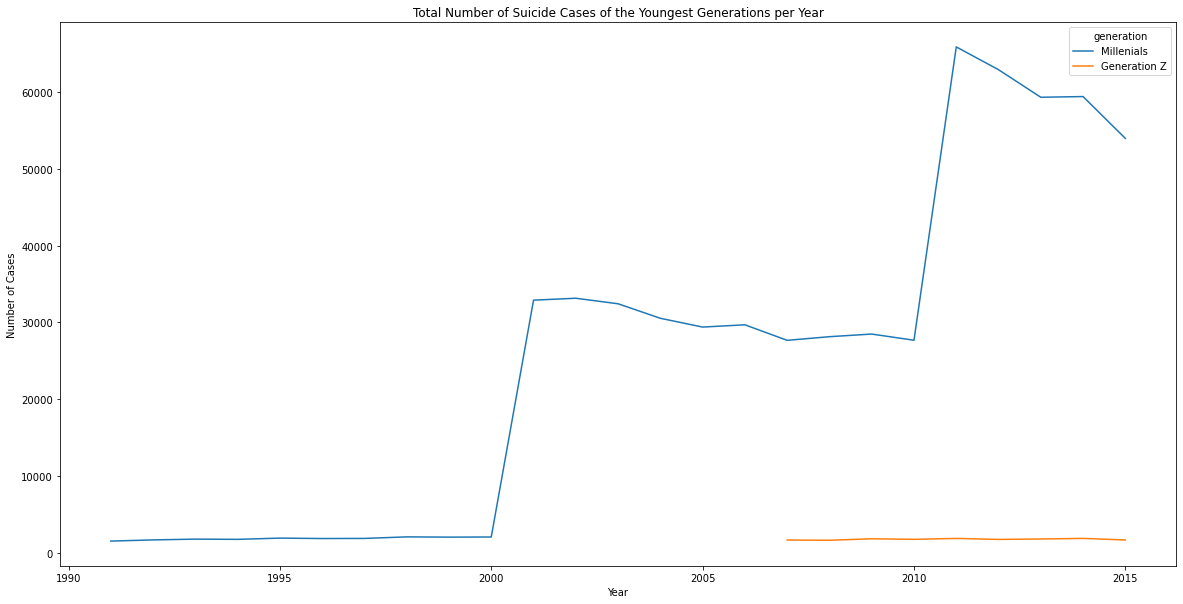

In [24]:
# Plot a more detailed graph to compare the number of suicide cases
# by generation per year.
df6 = df.groupby(['year', 'generation'], as_index=False).sum('suicides_no')
df6_top = df6[(df6['generation']=='Silent')|(df6['generation']=='Boomers')|(df6['generation']=='Generation X')]
df6_young = df6[(df6['generation']=='Millenials')|(df6['generation']=='Generation Z')] 

plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='suicides_no', data=df6_top, hue='generation')
plt.title('Total Number of Suicide Cases of the Top 3 Generations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='suicides_no', data=df6_young, hue='generation')
plt.title('Total Number of Suicide Cases of the Youngest Generations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()